In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import pandas as pd
from datasets import load_dataset

load_dataset('lukebarousse/data_jobs')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

# Filtering based on a country

In [4]:
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

In [9]:
df['job_country'].value_counts().head(5)

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694


In [17]:
# To find out if a desired country is in the list -> we use isin().any

df['job_country'].isin(['Brazil']).any()

True

In [18]:
# to filter based where a country is True

us_jobs = df[df['job_country'] == 'United States']

In [24]:
# united states jobs where we have data for the salary

us_jobs[us_jobs['salary_year_avg'].notna()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"['r', 'python', 'sql', 't-sql', 'hadoop', 'spa...","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"['golang', 'scala', 'python', 'java', 'hadoop'...","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [27]:
df.groupby(by = 'job_title_short')['salary_year_avg'].agg(['median','min','max','count']).sort_values('median')

,median,min,max,count
job_title_short,,,,
Business Analyst,85000.0,16500.0,387460.0,610
Cloud Engineer,90000.0,42000.0,280000.0,65
Data Analyst,90000.0,25000.0,650000.0,5451
Software Engineer,99150.0,28000.0,375000.0,467
Machine Learning Engineer,106415.0,30000.0,325000.0,576
Senior Data Analyst,111175.0,30000.0,425000.0,1131
Data Engineer,125000.0,15000.0,525000.0,4500
Data Scientist,127500.0,27000.0,960000.0,5922
Senior Data Engineer,147500.0,35000.0,425000.0,1591


# visualizing the data

In [31]:
import matplotlib.pyplot as plt
import numpy as np

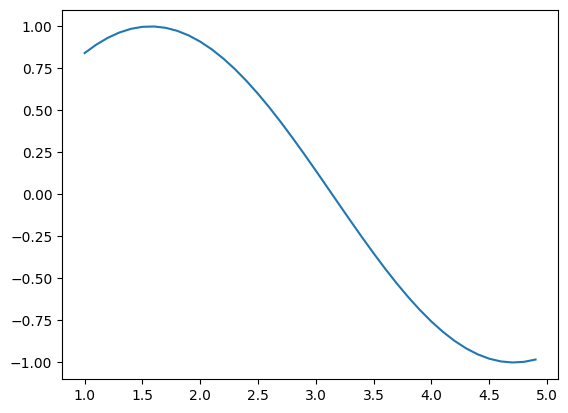

In [32]:
x = np.arange(1,5,.1)
y = np.sin(x)
plt.plot(x,y)